In [ ]:
#team members
#Kedar Gughane
#uzair khan
#laxman chincholakar
#Pranali khandare
#Bhumit Tyagi
#Hemant Kumbhar

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df=pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
df.info

<bound method DataFrame.info of          id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban 

In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


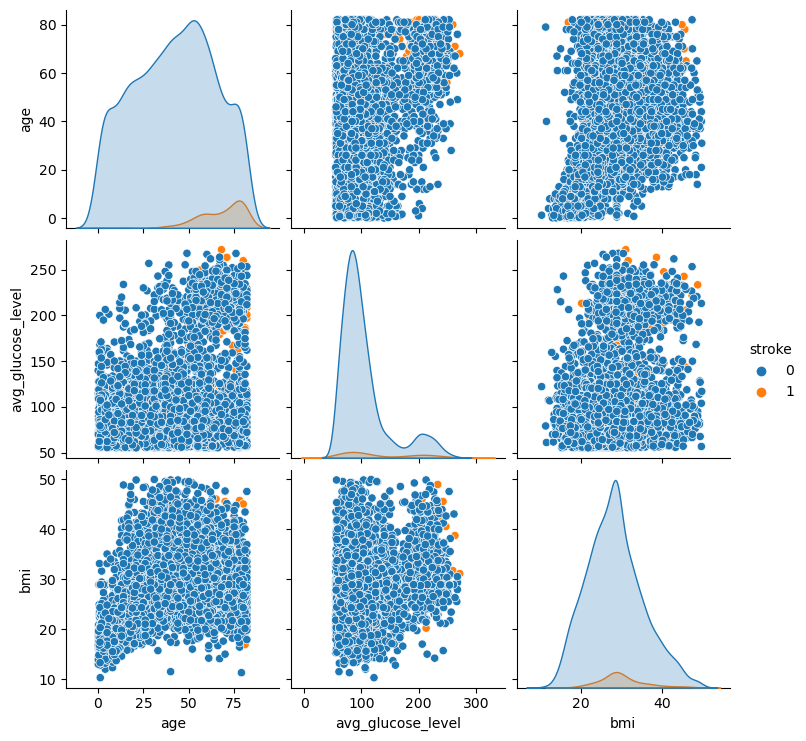

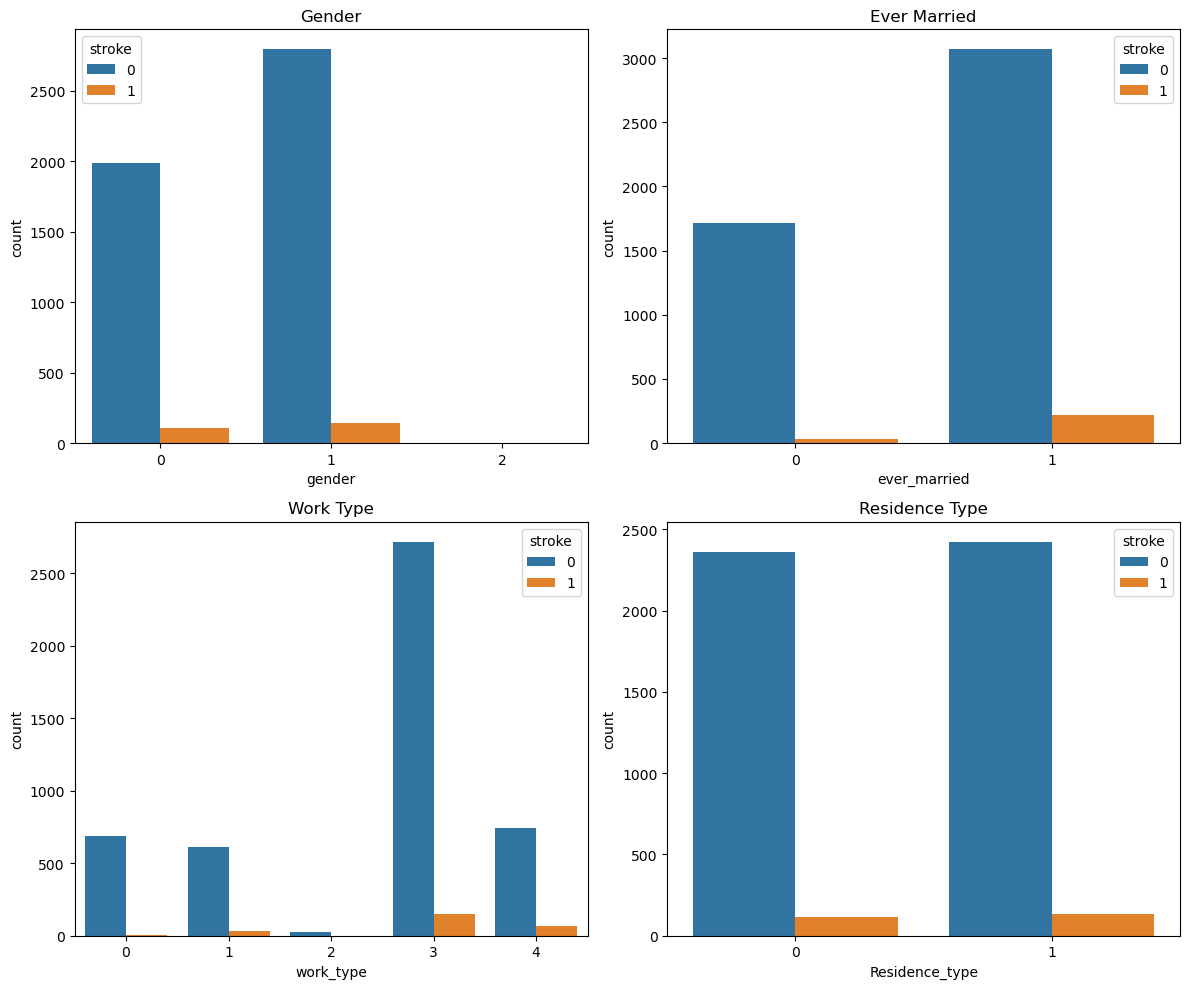

In [20]:
# EDA and Data Visualization
# Pairplot for numerical features
sns.pairplot(df[['age', 'avg_glucose_level', 'bmi', 'stroke']], hue='stroke')
plt.show()

# Bar plot for categorical features
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.countplot(ax=axes[0, 0], x='gender', hue='stroke', data=df)
axes[0, 0].set_title('Gender')

sns.countplot(ax=axes[0, 1], x='ever_married', hue='stroke', data=df)
axes[0, 1].set_title('Ever Married')

sns.countplot(ax=axes[1, 0], x='work_type', hue='stroke', data=df)
axes[1, 0].set_title('Work Type')

sns.countplot(ax=axes[1, 1], x='Residence_type', hue='stroke', data=df)
axes[1, 1].set_title('Residence Type')

plt.tight_layout()
plt.show()







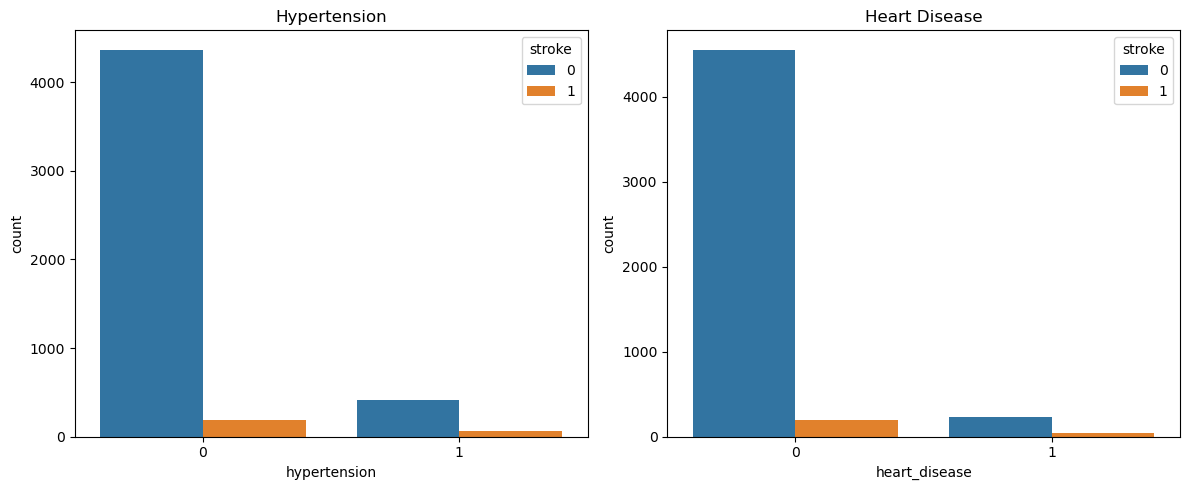

In [21]:
# Distribution of Hypertension and Heart Disease
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(ax=axes[0], x='hypertension', hue='stroke', data=df)
axes[0].set_title('Hypertension')

sns.countplot(ax=axes[1], x='heart_disease', hue='stroke', data=df)
axes[1].set_title('Heart Disease')

plt.tight_layout()
plt.show()

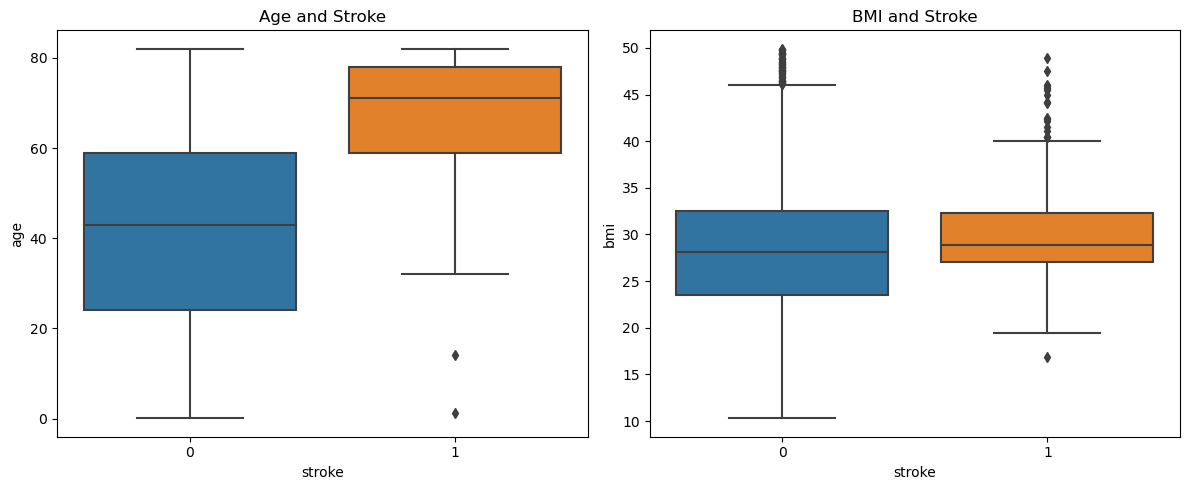

In [22]:
# Boxplot for Age and BMI
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(ax=axes[0], x='stroke', y='age', data=df)
axes[0].set_title('Age and Stroke')

sns.boxplot(ax=axes[1], x='stroke', y='bmi', data=df)
axes[1].set_title('BMI and Stroke')

plt.tight_layout()
plt.show()


In [23]:
# Data Cleaning
# Drop duplicates
df.drop_duplicates(inplace=True)

In [24]:
# Handle missing values
df['bmi'].fillna(df['bmi'].mean(), inplace=True)
df['smoking_status'].fillna('Unknown', inplace=True)  # Assuming 'Unknown' means information is unavailable

In [25]:
# Handle outliers (you can customize this based on your understanding of the data)
df = df[df['bmi'] < 50]  # Removing unrealistic BMI values

In [26]:
 #Feature selection
features = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 
            'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']

In [27]:
# Split the data into training and testing sets
X = df[features]
y = df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Model training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [29]:
# Model evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       947
           1       1.00      1.00      1.00        60

    accuracy                           1.00      1007
   macro avg       1.00      1.00      1.00      1007
weighted avg       1.00      1.00      1.00      1007

